In [26]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.3.0


# Hypothesis And Cost

In [27]:
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

Text(0.5, 1.0, 'DataSet')

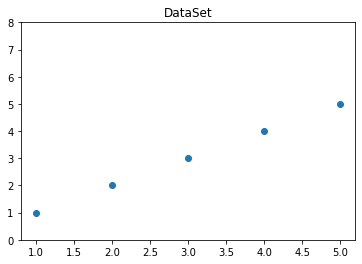

In [28]:
import matplotlib.pyplot as plt
plt.plot(x_data,y_data,'o')
plt.ylim(0,8)
plt.title('DataSet')

### Hypothesis

In [29]:
W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

In [30]:
W.numpy(), b.numpy() #행렬(튜플)로 반환

(2.0, 0.5)

In [31]:
hypothesis.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

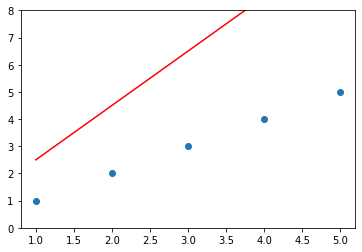

In [32]:
plt.plot(x_data,hypothesis.numpy(),'r-')
plt.plot(x_data,y_data,'o')
plt.ylim(0,8)
plt.show()

### Cost

In [33]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
#tf.reduce_mean() => 차원(rank)을 줄인 평균 값. tf.square(hypothesis - y_data) 여기까지는 1차원 리스트로 나오나 값은 0차원 값으로 나옴.

In [34]:
with tf.GradientTape() as tape: #Gradient descent 경사하강법. 경사를 줄여가며 cost를 최소화하는 알고리즘
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis-y_data))


W_grad, b_grad = tape.gradient(cost,[W,b]) #cost를 W와 b에 각각 편미분함.
W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

### Update parameter

In [35]:
learning_rate=0.01

W.assign_sub(learning_rate * W_grad) #A.assign_sub(B) ==> A = A-B
W.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.68, 0.5)

(0.0, 8.0)

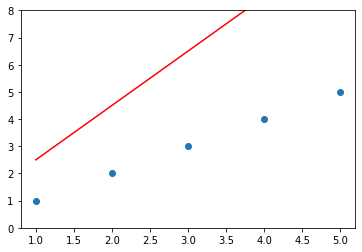

In [36]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

### Update Optimal Value

    0      2.4520      0.3760   45.660004  
   10      1.1036      0.0034    0.206336  
   20      1.0128     -0.0209    0.001026  
   30      1.0065     -0.0218    0.000093  
   40      1.0059     -0.0212    0.000083  
   50      1.0057     -0.0205    0.000077  
   60      1.0055     -0.0198    0.000072  
   70      1.0053     -0.0192    0.000067  
   80      1.0051     -0.0185    0.000063  
   90      1.0050     -0.0179    0.000059  


(0.0, 8.0)

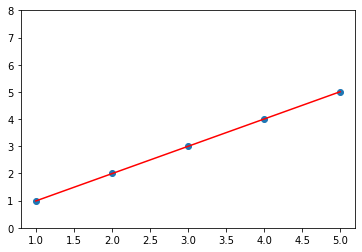

In [43]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis-y_data))
    W_grad, b_grad = tape.gradient(cost,[W,b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
        print("{:5}  {:10.4f}  {:10.4f}  {:10.6f}  ".format(i,W.numpy(),b.numpy(),cost))
        
plt.plot(x_data,y_data,'o')
plt.plot(x_data,hypothesis.numpy(),'r-')
plt.ylim(0,8)

### predict

In [44]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)
